# Imports

### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

### Importing data

In [2]:
iris = sns.load_dataset("iris")
# print(iris)
print(iris.describe())
column_headers = iris.columns.values.tolist()

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Exploratory Analysis

Target Labels ['setosa' 'versicolor' 'virginica']


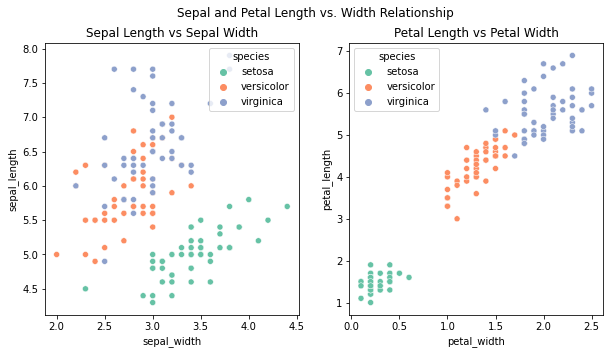

In [3]:
print("Target Labels", iris["species"].unique()) #this is the variable we are trying to predict

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.scatterplot(x="sepal_width", y="sepal_length", data=iris, hue="species", palette='Set2', ax=ax1) #relationship between sepal width and length
ax1.title.set_text('Sepal Length vs Sepal Width')
sns.scatterplot(x="petal_width", y="petal_length", data=iris, hue="species", palette='Set2', ax=ax2) #relationship between petal width and length
ax2.title.set_text('Petal Length vs Petal Width')

plt.suptitle('Sepal and Petal Length vs. Width Relationship')
plt.show()


The petal data is more useful to classify different species as it provides very clear distinctions between the different classes unlike the sepal data which is rather scattered.

To prove this, we can use scikit's feature selection module.

# Preparing Data for ML Model

In [4]:
from sklearn.model_selection import train_test_split #to split data into training and testing datasets
x = iris.drop("species", axis=1) #all data except species name
y = iris["species"] #this is our y (target variable), i.e. what we are gonna predict

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Selection

In [5]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

# Get the two best(k = 2) features using the SelectKBest method using the Chi-Squared function
ft = SelectKBest(chi2, k = 2).fit(x_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', x_train.columns)

# Get the two best(k = 2) features using the SelectKBest method using the f_classif function
ft = SelectKBest(f_classif, k = 2).fit(x_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', x_train.columns)

Score:  [ 9.20528817  2.64549493 93.52045645 54.20439381]
Columns:  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Score:  [ 99.1785033   33.46330527 937.77488303 817.41861607]
Columns:  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


# Training and Testing The Models

#### This is essentially a classification problem - so it is evident that we will make use of classifier algorithms such as KNN (k-nearest neighbor), Decision Tree and Random Forest.

In [6]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {"RandomForestClassifier": RandomForestClassifier(), "KNeighborsClassifier": KNeighborsClassifier(),"DecisionTreeClassifier":DecisionTreeClassifier()}

for key, classifier in classifiers.items():

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = classifier
    model.fit(x_train, y_train) 
    
    start_time = time.time()
    y_pred=model.predict(x_test)
    end_time = time.time()

    non_match_count = np.asarray([y_pred != y_test])

    print('\033[4m\033[1m' + key + '\033[0m')
    print("The number of predictions that do not match the expectation is:", non_match_count.sum())
    print("{0} took {1} s and its accuracy score is {2}".format(key,round(end_time - start_time,2), round(metrics.accuracy_score(y_test,y_pred),2)))
    print("---"*30)


RandomForestClassifier
The number of predictions that do not match the expectation is: 0
RandomForestClassifier took 0.0 s and its accuracy score is 1.0
------------------------------------------------------------------------------------------
KNeighborsClassifier
The number of predictions that do not match the expectation is: 1
KNeighborsClassifier took 0.0 s and its accuracy score is 0.97
------------------------------------------------------------------------------------------
DecisionTreeClassifier
The number of predictions that do not match the expectation is: 0
DecisionTreeClassifier took 0.0 s and its accuracy score is 1.0
------------------------------------------------------------------------------------------


In [7]:
print('Essential Part of Project Complete!')

Essential Part of Project Complete!


# Extensions:

# K-value variation (Manual)

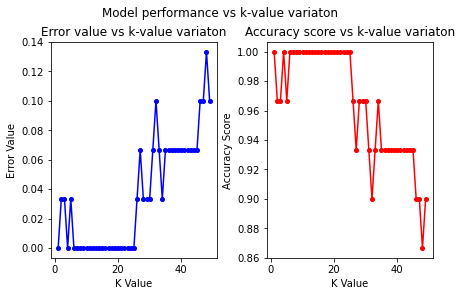

In [8]:
error=[]
mean_acc=[]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    mean_acc.append(metrics.accuracy_score(y_test,pred_i))


fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,constrained_layout=True)

ax1.plot(np.arange(1,50,1),error,marker='o', color='blue',ms=4,)
ax1.set_xlabel(('K Value'))
ax1.set_ylabel('Error Value')
ax1.set_title('Error value vs k-value variaton')

ax2.plot(np.arange(1,50,1),mean_acc,marker='o', color='red',ms=4)
ax2.set_title('Accuracy score vs k-value variaton')
ax2.set_xlabel(('K Value'))
ax2.set_ylabel('Accuracy Score')

plt.suptitle('Model performance vs k-value variaton')
plt.show()

# Hyperparameter Tuning (GridSearch)
vary 3 params: n_neighbors, weights, metric (distance metric)

In [9]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : np.arange(1,21,1),
               'weights':['uniform','distance'],
               'metric': ['minkowski','euclidean','manhattan']}

gs_cv = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =1, cv=5, n_jobs=-1)
gs_cv_model = gs_cv.fit(x_train,y_train)
print('\n', gs_cv_model.best_score_ ,'\n')
print('The best params are:', gs_cv_model.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits

 0.9666666666666668 

The best params are: {'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}


In [10]:
knn_best = knn = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform',algorithm = 'auto',metric = 'minkowski')
knn_best.fit(x_train,y_train)
y_knn_best = knn_best.predict(x_test)
print('Accuracy of hypertuned knn model: ',metrics.accuracy_score(y_test, y_knn_best))

Accuracy of hypertuned knn model:  1.0


# Model Evaluation

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------------------------------------

Cross Val Score: 0.9800000000000001 

------------------------------------------------------------------------------------------

Confusion Matrix:



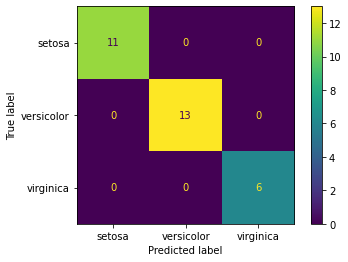

In [11]:
from sklearn.metrics import classification_report
print('\033[4m\033[1m' + 'Classification Report:\n' + '\033[0m')
print(classification_report(y_test, y_knn_best))

print("---"*30)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_best, x, y, cv =5)
print('\033[4m\033[1m' + '\nCross Val Score:' + '\033[0m', np.mean(scores), '\n')

print("---"*30)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print('\033[4m\033[1m' + '\nConfusion Matrix:\n' + '\033[0m')
cm = confusion_matrix(y_test, y_knn_best, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()

# Finding Most Optimal ML Model Using Lazy Predict

In [12]:
from lazypredict.Supervised import LazyClassifier 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
clf_model, clf_prediction= clf.fit(x_train, x_test, y_train, y_test)

print(clf_model)
print("---------")
print(clf_prediction)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.11it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.149906
[LightGBM] [Info] Start training from score -1.049822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

# Getting User Input Data to Identify Species

In [13]:
try:
  s_l = float(input("Enter the sepal length: "))
except ValueError:
    print("Please input numbers only...")  

try:
  s_w = float(input("Enter the sepal width: "))
except ValueError:
    print("Please input numbers only...")  
    
try:
  p_l = float(input("Enter the petal length: "))
except ValueError:
    print("Please input numbers only...")  

try:
  p_w = float(input("Enter the petal width: "))
except ValueError:
    print("Please input numbers only...")  
    
print("sepal length:", s_l, ", sepal width:", s_w, ", petal length:", p_l, ", petal width:", p_w)


Enter the sepal length: 7
Enter the sepal width: 4
Enter the petal length: 5
Enter the petal width: 2
sepal length: 7.0 , sepal width: 4.0 , petal length: 5.0 , petal width: 2.0


In [14]:
x_input = np.asarray([[s_l,s_w,p_l,p_w]])#.reshape((-1, 1))
print(x_input)

# prediction = knn.predict(x_input)


for key, classifier in classifiers.items():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = classifier
    model.fit(x_train, y_train) #training the model with the training data

    pred_input = model.predict(x_input)
    print("Based on the input values and using the {0} model, we expect it to be: {1}" .format('\033[4m\033[1m' + key + '\033[0m', pred_input))
    

[[7. 4. 5. 2.]]
Based on the input values and using the RandomForestClassifier model, we expect it to be: ['virginica']
Based on the input values and using the KNeighborsClassifier model, we expect it to be: ['virginica']
Based on the input values and using the DecisionTreeClassifier model, we expect it to be: ['versicolor']


# Saving the User Inputted Data (Might be useful later)

In [15]:
new_df = iris
new_df.loc[len(new_df.index)] = [s_l,s_w,p_l,p_w, pred_input]
new_df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica
149,5.90,3.00,5.10,1.80,virginica
150,7.00,4.00,5.00,2.00,[versicolor]


In [16]:
print('Project Complete!')

Project Complete!
